<a href="https://colab.research.google.com/github/xslobo05/MPA-MLF/blob/main/Lab_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load IRIS dataset, check contents

In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts

In [26]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a support vector machine for classification

In [3]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.score(X_test,y_test)

0.9333333333333333

In [9]:
SVMmodel.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Exploring:


*   Choose only first two features of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [28]:
from sklearn.model_selection import train_test_split
Xr=iris.data[iris.target!=2,0:2]
yr=iris.target[iris.target!=2]
X_trainr, X_testr, y_trainr, y_testr = train_test_split(Xr,yr,test_size=0.2)
print(X_trainr.shape)
print(X_testr.shape)

(80, 2)
(20, 2)


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

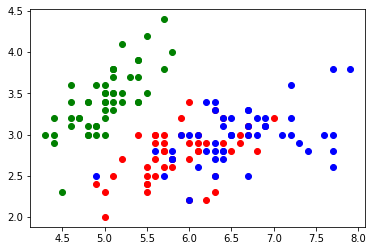

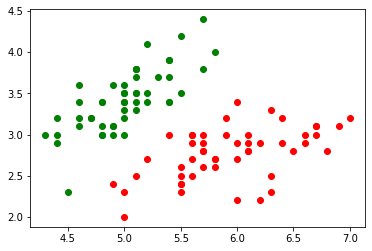

In [17]:
import matplotlib.pyplot as plt

plt.scatter(X[y==0,0],X[y==0,1],color='green')
plt.scatter(X[y==1,0],X[y==1,1],color='red')
plt.scatter(X[y==2,0],X[y==2,1],color='blue')

plt.figure()
plt.scatter(Xr[yr==0,0],Xr[yr==0,1],color='green')
plt.scatter(Xr[yr==1,0],Xr[yr==1,1],color='red')
plt.scatter(Xr[yr==2,0],Xr[yr==2,1],color='blue')

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

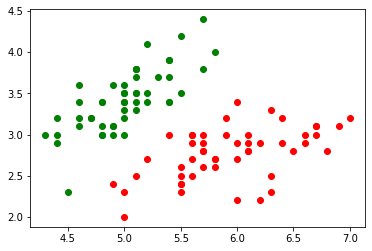

In [33]:
SVMmodel1=SVC(kernel='linear')
SVMmodel1.fit(X_train,y_train)
SVMmodel1.score(X_test,y_test)

SVMmodel2=SVC(kernel='linear')
SVMmodel2.fit(X_trainr,y_trainr)
SVMmodel2.score(X_testr,y_testr)

SVMmodel200=SVC(C = 200.0, kernel='linear')
SVMmodel200.fit(X_train,y_train)
SVMmodel200.score(X_test,y_test)

plt.scatter(Xr[yr==0,0],Xr[yr==0,1],color='green')
plt.scatter(Xr[yr==1,0],Xr[yr==1,1],color='red')
plt.scatter(Xr[yr==2,0],Xr[yr==2,1],color='blue')


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

[[4.5 2.3]
 [4.8 3. ]
 [5.4 3.4]
 [5.2 3.4]
 [5.8 4. ]
 [5.5 3.5]
 [4.9 3.1]
 [4.8 3. ]
 [6.  3.4]
 [5.6 2.9]
 [5.4 3. ]
 [5.  2.3]
 [4.9 2.4]
 [5.6 3. ]
 [5.6 3. ]
 [5.1 2.5]]
[[ 2.22228098 -2.22222814]]
[-5.0002831]


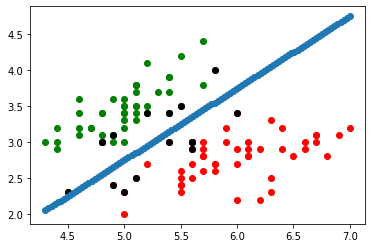

In [57]:
import numpy as np

supvectors=SVMmodel2.support_vectors_
# Plot the support vectors here
print(supvectors)
plt.scatter(Xr[yr==0,0],Xr[yr==0,1],color='green')
plt.scatter(Xr[yr==1,0],Xr[yr==1,1],color='red')
plt.scatter(supvectors[:,0],supvectors[:,1],color='black')

#Separating line coefficients:
W=SVMmodel2.coef_
b=SVMmodel2.intercept_
print(W)
print(b)

# line: w.x+b=0
pointsX = np.linspace(min(Xr[:,0]),max(Xr[:,0]),100)
pointsY = -(W[:,0]/W[:,1])*pointsX - (b/W[:,1])
#print(W[0][0]/W[0][1])
#print(pointsX)
#print(pointsY)
plt.scatter(pointsX, pointsY)


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

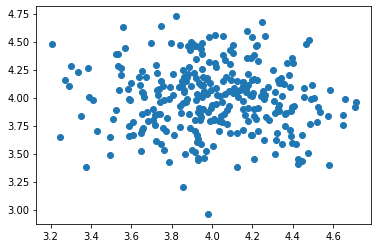

In [6]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()

Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

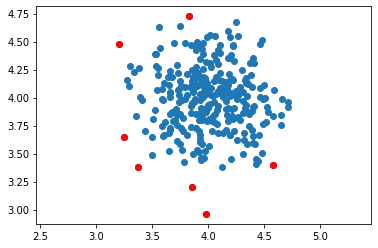

In [50]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

Plot the support vectors:

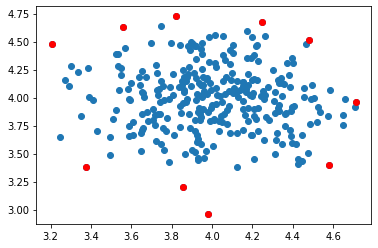

In [52]:
supvectors = SVMmodelOne.support_vectors_
plt.scatter(x[:,0], x[:,1])
plt.scatter(supvectors[:,0], supvectors[:,1], color='red')

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


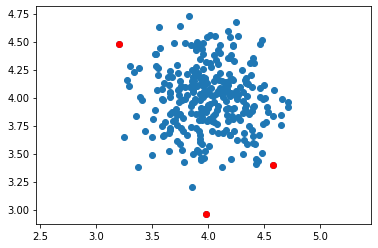

In [8]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()